In [4]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


conn = psycopg2.connect(
    dbname="final_project",
    user="postgres",
    password="7774",
    host="localhost",
    port="5432"
)
cur = conn.cursor()

In [35]:
sql = """SELECT*
        FROM disaster
        LIMIT 10;"""

df4 = pd.read_sql(sql, conn)
print(df4)

   disaster_id  year  month           group     type           subtype  iso  \
0            1  1970      1    Hydrological    Flood              None  ARG   
1            2  1970      1  Meteorological    Storm  Tropical cyclone  AUS   
2            3  1970      9    Hydrological    Flood              None  BEN   
3            4  1970     11  Meteorological    Storm  Tropical cyclone  BGD   
4            5  1970      4  Meteorological    Storm              None  BGD   
5            6  1970      7    Hydrological    Flood              None  BGD   
6            7  1970     10  Meteorological    Storm              None  BGD   
7            8  1970      8  Climatological  Drought           Drought  BRA   
8            9  1970      7    Hydrological    Flood              None  BRA   
9           10  1970     10    Hydrological    Flood              None  BRB   

  continent                     region     country  total_deaths  \
0  Americas              South America   Argentina          36

C:\Users\Administrator\AppData\Local\Temp\ipykernel_31912\512018013.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(sql, conn)


# What's the most common disaster type?

#### Flood is the most common disaster type.

In [36]:
cur.execute(
    """SELECT type AS most_common_disaster, COUNT(*) AS frequency
        FROM disaster
        GROUP BY type
        ORDER BY frequency DESC
        LIMIT 10;""")
rows = cur.fetchall()
for row in rows:
    print(row)

('Flood', 5272)
('Storm', 4005)
('Epidemic', 1436)
('Earthquake', 1137)
('Landslide', 713)
('Drought', 685)
('Extreme temperature', 584)
('Wildfire', 452)
('Volcanic activity', 222)
('Insect infestation', 93)


## What's the most common disaster subtype?

#### Riverine flood is the most common disaster subtype.

In [37]:
cur.execute(
    """SELECT subtype AS most_common_subtype, COUNT(*) AS frequency
        FROM disaster
        WHERE subtype IS NOT NULL
        GROUP BY subtype
        ORDER BY frequency DESC
        LIMIT 10;""")
rows = cur.fetchall()
for row in rows:
    print(row)

('Riverine flood', 2633)
('Tropical cyclone', 2066)
('Ground movement', 1097)
('Convective storm', 1084)
('Flash flood', 770)
('Bacterial disease', 744)
('Drought', 684)
('Landslide', 525)
('Viral disease', 509)
('Forest fire', 303)


## TOP 10 disaster with the most deaths

#### The disaster with the most deaths was the tropical cyclone in Bangladesh 1970.

In [38]:
cur.execute(
    """SELECT total_deaths, type, subtype, country, year
        FROM disaster
        WHERE total_deaths IS NOT NULL
        ORDER BY total_deaths DESC
        LIMIT 10;""")
rows = cur.fetchall()
for row in rows:
    print(row)

(300000, 'Storm', 'Tropical cyclone', 'Bangladesh', 1970)
(300000, 'Drought', 'Drought', 'Ethiopia', 1983)
(242000, 'Earthquake', 'Ground movement', 'China', 1976)
(222570, 'Earthquake', 'Ground movement', 'Haiti', 2010)
(165708, 'Earthquake', 'Tsunami', 'Indonesia', 2004)
(150000, 'Drought', 'Drought', 'Sudan (the)', 1983)
(138866, 'Storm', 'Tropical cyclone', 'Bangladesh', 1991)
(138366, 'Storm', 'Tropical cyclone', 'Myanmar', 2008)
(100000, 'Drought', 'Drought', 'Ethiopia', 1973)
(100000, 'Drought', 'Drought', 'Mozambique', 1981)


## TOP 10 disaster with most affected

#### The disaster with the most affected was the Drought in India 2015.

In [39]:
cur.execute(
    """SELECT total_affected, type, subtype, country, year
        FROM disaster
        WHERE total_affected IS NOT NULL
        ORDER BY total_affected DESC
        LIMIT 10;""")
rows = cur.fetchall()
for row in rows:
    print(row)

(330000000, 'Drought', 'Drought', 'India', 2015)
(300000000, 'Drought', 'Drought', 'India', 1987)
(300000000, 'Drought', 'Drought', 'India', 2002)
(238973000, 'Flood', 'Riverine flood', 'China', 1998)
(210232227, 'Flood', 'Riverine flood', 'China', 1991)
(200000000, 'Drought', 'Drought', 'India', 1972)
(154634000, 'Flood', 'Riverine flood', 'China', 1996)
(150146000, 'Flood', 'Riverine flood', 'China', 2003)
(134000000, 'Flood', 'Riverine flood', 'China', 2010)
(128000000, 'Flood', None, 'India', 1993)


## Which disaster causes the most damage?

#### The disaster type with the most damage was Flood.

In [40]:
sql4 = """SELECT type, SUM(total_deaths) AS total_deaths, SUM(total_affected) AS total_affected
        FROM disaster
        WHERE total_deaths IS NOT NULL
        GROUP BY type
        ORDER BY SUM(total_affected) DESC, SUM(total_deaths) DESC
        ;"""

cur.execute(sql4)

rows = cur.fetchall()
for row in rows:
    print(row)

('Flood', 330683, 3703017929)
('Storm', 817134, 1068127184)
('Drought', 700774, 538026695)
('Earthquake', 1319284, 188256672)
('Extreme temperature', 189101, 94066463)
('Epidemic', 259735, 21775472)
('Landslide', 40737, 10439375)
('Volcanic activity', 27135, 5989261)
('Wildfire', 2963, 4208371)
('Mass movement (dry)', 2324, 17487)
('Glacial lake outburst', 250, 24)
('Animal accident', 12, 5)


In [41]:
df4 = pd.read_sql(sql4, conn)
print(df4)

                     type  total_deaths  total_affected
0                   Flood        330683      3703017929
1                   Storm        817134      1068127184
2                 Drought        700774       538026695
3              Earthquake       1319284       188256672
4     Extreme temperature        189101        94066463
5                Epidemic        259735        21775472
6               Landslide         40737        10439375
7       Volcanic activity         27135         5989261
8                Wildfire          2963         4208371
9     Mass movement (dry)          2324           17487
10  Glacial lake outburst           250              24
11        Animal accident            12               5


C:\Users\Administrator\AppData\Local\Temp\ipykernel_31912\3762264104.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(sql4, conn)


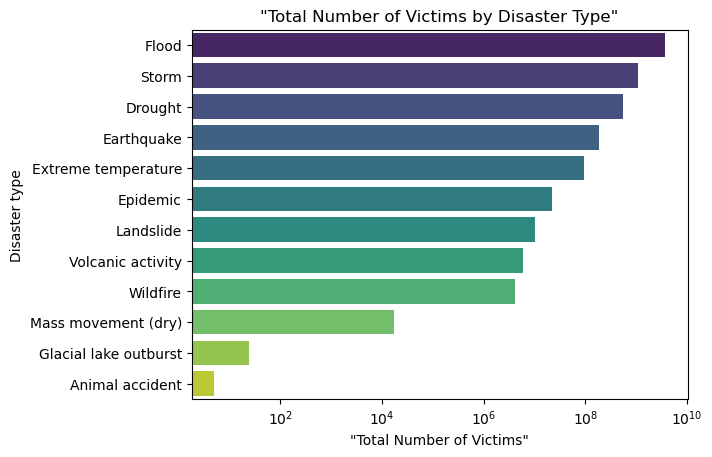

In [42]:
sns.barplot(x='total_affected', y='type', data=df4, palette='viridis')
plt.title('"Total Number of Victims by Disaster Type"')
plt.xscale('log')  
plt.xlabel('"Total Number of Victims"')
plt.ylabel('Disaster type')

plt.show()

## Classifying disaster based on Total Deaths

In [46]:
sql8 = """SELECT type, iso, total_deaths,
	CASE WHEN total_deaths > 99999 THEN 'Catastrophic'
		 WHEN total_deaths > 24999 THEN 'Severe'
		 WHEN total_deaths > 9999 THEN 'Moderate'
		 ELSE 'Minor' END AS disaster_level
	FROM disaster
	WHERE total_deaths IS NOT NULL
	ORDER BY total_deaths DESC
    LIMIT 50;"""

cur.execute(sql8)

rows = cur.fetchall()
for row in rows:
    print(row)

('Storm', 'BGD', 300000, 'Catastrophic')
('Drought', 'ETH', 300000, 'Catastrophic')
('Earthquake', 'CHN', 242000, 'Catastrophic')
('Earthquake', 'HTI', 222570, 'Catastrophic')
('Earthquake', 'IDN', 165708, 'Catastrophic')
('Drought', 'SDN', 150000, 'Catastrophic')
('Storm', 'BGD', 138866, 'Catastrophic')
('Storm', 'MMR', 138366, 'Catastrophic')
('Drought', 'ETH', 100000, 'Catastrophic')
('Drought', 'MOZ', 100000, 'Catastrophic')
('Earthquake', 'CHN', 87476, 'Severe')
('Earthquake', 'PAK', 73338, 'Severe')
('Earthquake', 'PER', 66794, 'Severe')
('Extreme temperature', 'RUS', 55736, 'Severe')
('Earthquake', 'IRN', 40000, 'Severe')
('Earthquake', 'LKA', 35399, 'Severe')
('Flood', 'VEN', 30000, 'Severe')
('Flood', 'BGD', 28700, 'Severe')
('Earthquake', 'IRN', 26796, 'Severe')
('Earthquake', 'SUN', 25000, 'Severe')
('Earthquake', 'IRN', 25000, 'Severe')
('Earthquake', 'GTM', 23000, 'Moderate')
('Volcanic activity', 'COL', 21800, 'Moderate')
('Extreme temperature', 'ITA', 20089, 'Moderate')


In [47]:
df8 = pd.read_sql(sql8, conn)
print(df8)

                   type  iso  total_deaths disaster_level
0                 Storm  BGD        300000   Catastrophic
1               Drought  ETH        300000   Catastrophic
2            Earthquake  CHN        242000   Catastrophic
3            Earthquake  HTI        222570   Catastrophic
4            Earthquake  IDN        165708   Catastrophic
5               Drought  SDN        150000   Catastrophic
6                 Storm  BGD        138866   Catastrophic
7                 Storm  MMR        138366   Catastrophic
8               Drought  ETH        100000   Catastrophic
9               Drought  MOZ        100000   Catastrophic
10           Earthquake  CHN         87476         Severe
11           Earthquake  PAK         73338         Severe
12           Earthquake  PER         66794         Severe
13  Extreme temperature  RUS         55736         Severe
14           Earthquake  IRN         40000         Severe
15           Earthquake  LKA         35399         Severe
16            

C:\Users\Administrator\AppData\Local\Temp\ipykernel_31912\228074176.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df8 = pd.read_sql(sql8, conn)


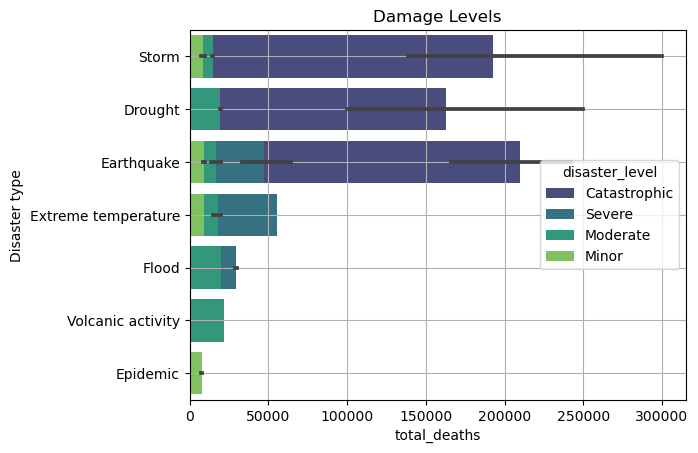

In [50]:
sns.barplot(x='total_deaths', y='type', hue='disaster_level', data=df8, palette='viridis', dodge=False)
plt.title('Damage Levels')
plt.xlabel('total_deaths')
plt.ylabel('Disaster type')
plt.legend(title='disaster_level')
plt.grid(True)
plt.show()

## Countries with the most number of disaster

In [51]:
cur.execute(
    """SELECT country, COUNT(type)
    	FROM disaster
    	GROUP BY country
    	ORDER BY COUNT(type) DESC
        LIMIT 10;""")
rows = cur.fetchall()
for row in rows:
    print(row)

('United States of America (the)', 949)
('China', 906)
('India', 658)
('Philippines (the)', 612)
('Indonesia', 528)
('Bangladesh', 317)
('Japan', 272)
('Mexico', 262)
('Vietnam', 241)
('Australia', 240)


## What is the frequency of disasters by type over time? (year, month) Trends

In [52]:
sql1 = """SELECT 
          FLOOR((year - 1970) / 10) * 10 + 1970 AS decade, type, COUNT(type) AS frequency
        FROM disaster
        WHERE year >= 1970 AND year <= 2021
        GROUP BY FLOOR((year - 1970) / 10), type
        ORDER BY decade, frequency DESC; """

cur.execute(sql1)
    
rows = cur.fetchall()
for row in rows:
    print(row)

(1970.0, 'Storm', 291)
(1970.0, 'Flood', 264)
(1970.0, 'Earthquake', 112)
(1970.0, 'Drought', 61)
(1970.0, 'Epidemic', 59)
(1970.0, 'Landslide', 54)
(1970.0, 'Wildfire', 26)
(1970.0, 'Volcanic activity', 23)
(1970.0, 'Extreme temperature', 15)
(1970.0, 'Insect infestation', 5)
(1970.0, 'Mass movement (dry)', 1)
(1980.0, 'Storm', 558)
(1980.0, 'Flood', 524)
(1980.0, 'Earthquake', 172)
(1980.0, 'Drought', 126)
(1980.0, 'Epidemic', 124)
(1980.0, 'Landslide', 104)
(1980.0, 'Wildfire', 60)
(1980.0, 'Insect infestation', 48)
(1980.0, 'Extreme temperature', 38)
(1980.0, 'Volcanic activity', 32)
(1980.0, 'Mass movement (dry)', 15)
(1990.0, 'Storm', 899)
(1990.0, 'Flood', 865)
(1990.0, 'Epidemic', 385)
(1990.0, 'Earthquake', 266)
(1990.0, 'Landslide', 150)
(1990.0, 'Drought', 140)
(1990.0, 'Wildfire', 103)
(1990.0, 'Extreme temperature', 92)
(1990.0, 'Volcanic activity', 52)
(1990.0, 'Mass movement (dry)', 12)
(1990.0, 'Insect infestation', 11)
(2000.0, 'Flood', 1725)
(2000.0, 'Storm', 1048)
(2

In [53]:
df1 = pd.read_sql(sql1, conn)
print(df1)

    decade                   type  frequency
0   1970.0                  Storm        291
1   1970.0                  Flood        264
2   1970.0             Earthquake        112
3   1970.0                Drought         61
4   1970.0               Epidemic         59
..     ...                    ...        ...
63  2020.0      Volcanic activity         12
64  2020.0               Epidemic         11
65  2020.0    Extreme temperature          7
66  2020.0     Insect infestation          2
67  2020.0  Glacial lake outburst          2

[68 rows x 3 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_31912\2818906282.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(sql1, conn)


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


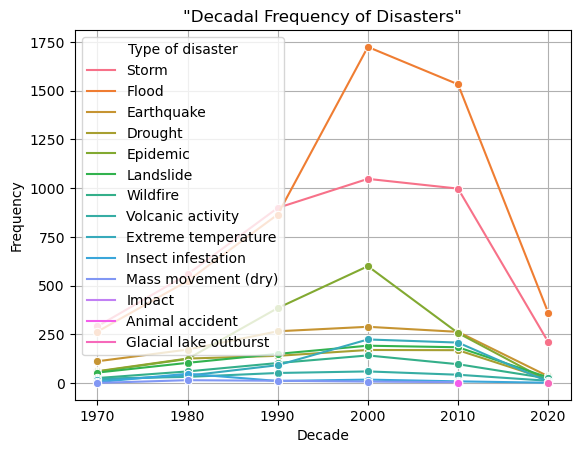

In [54]:
sns.lineplot(x='decade', y='frequency', hue='type', data=df1, marker='o')
plt.title('"Decadal Frequency of Disasters"')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.legend(title='Type of disaster')
plt.grid(True)
plt.show()

## Which country and continent is the most vulnerable to disasters?

#### ASIA - China
#### AMERICAS - Usa
#### AFRICA - Ethiopia
#### EUROPE - Spain
#### OCEANIA - Indonesia


In [55]:
sql2 = """SELECT continent, iso, COUNT(type) AS frequency, SUM(total_deaths) AS total_deaths, SUM(total_affected) AS total_affected
        FROM disaster
        GROUP BY continent, iso
        ORDER BY continent, frequency DESC,  SUM(total_deaths) DESC, SUM(total_affected) DESC
    ;"""

cur.execute(sql2)

rows = cur.fetchall()
for row in rows:
    print(row)

('Africa', 'COD', 138, 17807, 3493831)
('Africa', 'NGA', 136, 29310, 16109169)
('Africa', 'KEN', 119, 7408, 69455183)
('Africa', 'ETH', 116, 414475, 84210377)
('Africa', 'MOZ', 115, 106953, 39986709)
('Africa', 'TZA', 110, 10422, 16250487)
('Africa', 'ZAF', 105, 2232, 22287734)
('Africa', 'UGA', 100, 2969, 6878169)
('Africa', 'SDN', 99, 162327, 36144252)
('Africa', 'SOM', 97, 49759, 33858712)
('Africa', 'NER', 92, 10933, 34710246)
('Africa', 'MDG', 88, 5045, 20267592)
('Africa', 'DZA', 77, 7089, 1961229)
('Africa', 'AGO', 74, 6222, 7303362)
('Africa', 'MWI', 70, 3172, 32267380)
('Africa', 'BDI', 62, 1218, 4735774)
('Africa', 'TCD', 60, 10534, 10674673)
('Africa', 'BFA', 59, 16870, 15321517)
('Africa', 'MLI', 57, 3569, 14060131)
('Africa', 'CMR', 54, 6117, 1081839)
('Africa', 'GHA', 52, 1820, 17596395)
('Africa', 'RWA', 52, 1200, 6264690)
('Africa', 'ZWE', 51, 7604, 27382277)
('Africa', 'BEN', 51, 1561, 5329800)
('Africa', 'MAR', 50, 1974, 3589427)
('Africa', 'ZMB', 50, 1420, 11548950)


In [56]:
df2 = pd.read_sql(sql2, conn)
print(df2)

    continent  iso  frequency  total_deaths  total_affected
0      Africa  COD        138       17807.0       3493831.0
1      Africa  NGA        136       29310.0      16109169.0
2      Africa  KEN        119        7408.0      69455183.0
3      Africa  ETH        116      414475.0      84210377.0
4      Africa  MOZ        115      106953.0      39986709.0
..        ...  ...        ...           ...             ...
223   Oceania  ASM          5          40.0         25563.0
224   Oceania  MNP          5           5.0           860.0
225   Oceania  TKL          3           NaN          1858.0
226   Oceania  WLF          3           6.0          5772.0
227   Oceania  NIU          3           2.0          1199.0

[228 rows x 5 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_31912\910996815.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(sql2, conn)


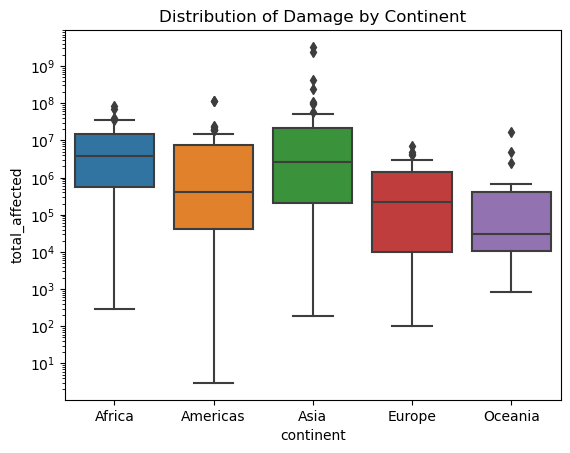

In [57]:
sns.boxplot(x='continent', y='total_affected', data=df2)
plt.title('Distribution of Damage by Continent')
plt.yscale('log') 
plt.show()

## Do the most frequent disasters cause the most damage? Analyzing the correlation between frequency and damage.

In [58]:
sql3 =  """SELECT type, COUNT(type) AS frequency, SUM(total_deaths) AS total_deaths, SUM(total_affected) AS total_affected
        FROM disaster
        GROUP BY type
        ORDER BY frequency DESC, total_deaths DESC, total_affected DESC
        ;"""

cur.execute(sql3)

rows = cur.fetchall()
for row in rows:
    print(row)

('Flood', 5272, 330683, 3818297076)
('Storm', 4005, 817134, 1192002045)
('Epidemic', 1436, 259735, 29040259)
('Earthquake', 1137, 1319284, 195900647)
('Landslide', 713, 40737, 10648275)
('Drought', 685, 700774, 2655002730)
('Extreme temperature', 584, 189101, 103635513)
('Wildfire', 452, 2963, 17938908)
('Volcanic activity', 222, 27135, 9374131)
('Insect infestation', 93, None, 2802200)
('Mass movement (dry)', 41, 2324, 25487)
('Glacial lake outburst', 2, 250, 24)
('Impact', 1, None, 301491)
('Animal accident', 1, 12, 5)


In [59]:
df3 = pd.read_sql(sql3, conn)
print(df3)

                     type  frequency  total_deaths  total_affected
0                   Flood       5272      330683.0      3818297076
1                   Storm       4005      817134.0      1192002045
2                Epidemic       1436      259735.0        29040259
3              Earthquake       1137     1319284.0       195900647
4               Landslide        713       40737.0        10648275
5                 Drought        685      700774.0      2655002730
6     Extreme temperature        584      189101.0       103635513
7                Wildfire        452        2963.0        17938908
8       Volcanic activity        222       27135.0         9374131
9      Insect infestation         93           NaN         2802200
10    Mass movement (dry)         41        2324.0           25487
11  Glacial lake outburst          2         250.0              24
12                 Impact          1           NaN          301491
13        Animal accident          1          12.0            

C:\Users\Administrator\AppData\Local\Temp\ipykernel_31912\917824543.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(sql3, conn)


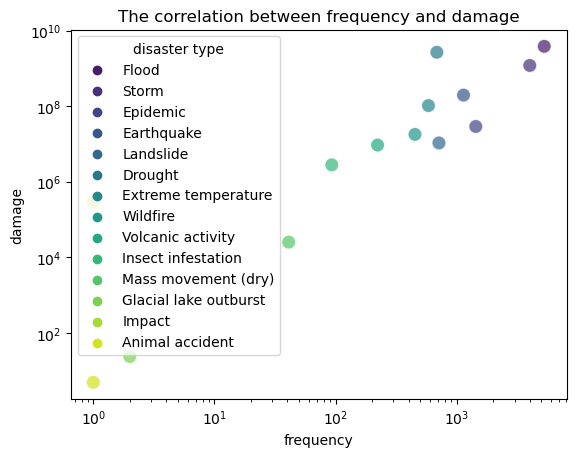

In [222]:
sns.scatterplot(x='frequency', y='total_affected', data=df3, hue='type', palette='viridis', s=100, alpha=0.7)
plt.title('The correlation between frequency and damage')
plt.xscale('log')  
plt.yscale('log')  
plt.xlabel('frequency')
plt.ylabel('damage')
plt.legend(title='disaster type')

plt.show()

# Top 10 disaster in Brazil

##### Flood is the most common disaster in Brazil. And Second thing is Landslide. Landslides are usually caused by floods.

In [4]:
cur.execute(
    """SELECT type AS most_common_disaster, COUNT(*) AS frequency
        FROM disaster
        WHERE iso ='BRA'	
        GROUP BY type
        ORDER BY frequency DESC;""")
rows = cur.fetchall()
for row in rows:
    print(row)

('Flood', 138)
('Landslide', 21)
('Drought', 19)
('Epidemic', 18)
('Storm', 17)
('Extreme temperature', 7)
('Wildfire', 4)
('Earthquake', 2)
('Insect infestation', 1)


# Most common subtype disaster in Brazil

##### Riverine flood is the most common subtype disaster.

In [5]:
cur.execute(
    """SELECT subtype AS most_common_sub, COUNT(*) AS frequency
        FROM disaster
        WHERE iso = 'BRA' AND subtype IS NOT NULL
        GROUP BY subtype
        ORDER BY frequency DESC;""")
rows = cur.fetchall()
for row in rows:
    print(row)

('Riverine flood', 69)
('Drought', 19)
('Flash flood', 12)
('Convective storm', 11)
('Viral disease', 11)
('Landslide', 11)
('Mudslide', 10)
('Bacterial disease', 5)
('Cold wave', 5)
('Land fire (Brush, Bush, Pasture)', 2)
('Ground movement', 2)
('Forest fire', 2)
('Heat wave', 2)
('Tropical cyclone', 1)
('Extra-tropical storm', 1)


# The annual frequency of natural disasters in Brazil

##### The frequency of floods has been increasing each year.

In [6]:
sql7 = """SELECT year, type, COUNT(type) AS frequency
        FROM disaster
        WHERE iso ='BRA'
        GROUP BY year, type
        ORDER BY year, frequency DESC
        ;"""

df7 = pd.read_sql(sql7,conn)
print(df7)

     year       type  frequency
0    1970      Flood          1
1    1970    Drought          1
2    1971      Flood          2
3    1973      Flood          1
4    1974  Landslide          2
..    ...        ...        ...
119  2019   Wildfire          1
120  2020      Flood          5
121  2020    Drought          1
122  2020      Storm          1
123  2021      Flood          7

[124 rows x 3 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_31912\2701414092.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df7 = pd.read_sql(sql7,conn)


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


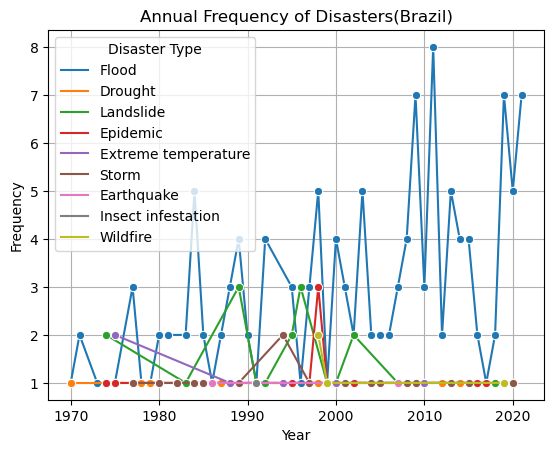

In [7]:
sns.lineplot(x='year', y='frequency', hue='type', data=df7, marker='o')

plt.title('Annual Frequency of Disasters(Brazil)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Disaster Type')
plt.grid(True)

plt.show()

# Top 10 disaster in Korea

##### Storms are a common natural disaster in Korea. And second thing is Flood.

In [8]:
cur.execute(
    """SELECT type AS most_common_disaster, COUNT(*) AS frequency
        FROM disaster
        WHERE iso ='KOR'	
        GROUP BY type
        ORDER BY frequency DESC;""")
rows = cur.fetchall()
for row in rows:
    print(row)

('Storm', 54)
('Flood', 32)
('Landslide', 7)
('Wildfire', 4)
('Epidemic', 4)
('Extreme temperature', 3)
('Earthquake', 2)
('Drought', 1)


# Most common subtype disaster in Korea

##### Tropical cyclones are the primary natural disaster that occurs in Korea.

In [9]:
cur.execute(
    """SELECT subtype AS most_common_sub, COUNT(*) AS frequency
        FROM disaster
        WHERE iso = 'KOR' AND subtype IS NOT NULL
        GROUP BY subtype
        ORDER BY frequency DESC;""")
rows = cur.fetchall()
for row in rows:
    print(row)

('Tropical cyclone', 40)
('Riverine flood', 10)
('Flash flood', 8)
('Landslide', 6)
('Forest fire', 4)
('Convective storm', 3)
('Viral disease', 3)
('Ground movement', 2)
('Heat wave', 2)
('Bacterial disease', 1)
('Mudslide', 1)
('Drought', 1)
('Cold wave', 1)
('Coastal flood', 1)


# The annual frequency of natural disasters in Korea

##### The frequency of storm has been increasing since the late 1990s.

In [10]:
sql6 = """SELECT year, type, COUNT(type) AS frequency
        FROM disaster
        WHERE iso ='KOR'
        GROUP BY year, type
        ORDER BY year, frequency DESC
        ;"""
df6 = pd.read_sql(sql6, conn)
print(df6)

    year                 type  frequency
0   1970                Flood          1
1   1970                Storm          1
2   1971                Storm          2
3   1972                Flood          2
4   1976            Landslide          1
..   ...                  ...        ...
72  2018  Extreme temperature          1
73  2019                Storm          3
74  2019             Wildfire          1
75  2020                Storm          3
76  2020                Flood          2

[77 rows x 3 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_31912\27501929.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql(sql6, conn)


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


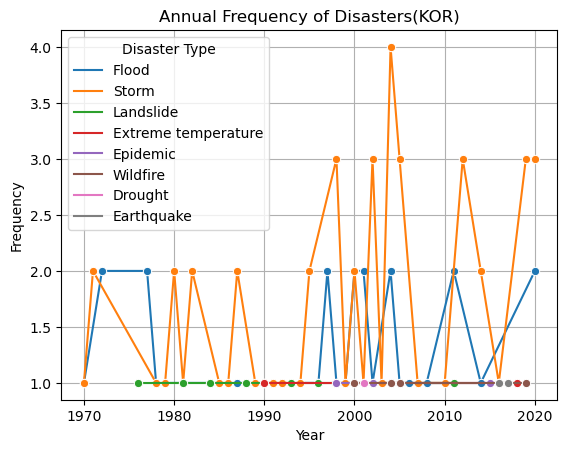

In [11]:
sns.lineplot(x='year', y='frequency', hue='type', data=df6, marker='o')
plt.title('Annual Frequency of Disasters(KOR)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Disaster Type')
plt.grid(True)

plt.show()

# Number of victims by decade (BRA and KOR)

##### During the 2010s recorded the highest damage from natural disasters in Brazil.
##### Korea is showing a trend of decreasing damage from natural disasters.

###### To calculate the decade, I used the floor function like this: Since we have a dataset from 1970 to 2021, 
###### I subtracted 1970 from each year in our dataset and then divided by 10.
###### This gives a decimal number, which I round down to the nearest whole number

###### I excluded the values from 2020 to 2021 from the graph because they don't fit the decade grouping.

###### It looks like there is a huge gap between the number of damages in Brazil and Korea, but actually, these two countries have different scales of population and land area.

In [5]:
sql10 = """
        SELECT
          FLOOR((year - 1970) / 10) * 10 + 1970 AS decade,
          iso,
          SUM(total_deaths) AS total_deaths,
          SUM(total_affected) AS total_affected
        FROM
          disaster
        WHERE
          year >= 1970 AND year < 2020
		AND iso IN ('KOR','BRA')
        GROUP BY
          FLOOR((year - 1970) / 10), iso
        ORDER BY
          decade, iso;
    ;"""
df10 = pd.read_sql(sql10, conn)
print(df10)

   decade  iso  total_deaths  total_affected
0  1970.0  BRA          2899        17933178
1  1970.0  KOR          1405         1254889
2  1980.0  BRA          2255        29728093
3  1980.0  KOR          1452          686393
4  1990.0  BRA           982        10712897
5  1990.0  KOR          1159          444754
6  2000.0  BRA          1324         7206296
7  2000.0  KOR           629          560884
8  2010.0  BRA          2097        45158914
9  2010.0  KOR           268          200208


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22132\2641978388.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df10 = pd.read_sql(sql10, conn)


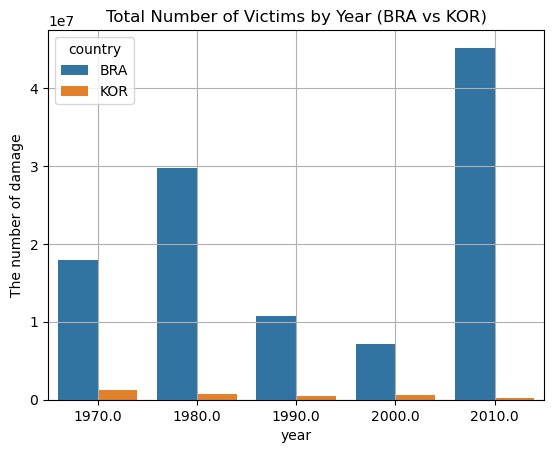

In [6]:
sns.barplot(x='decade', y='total_affected', hue='iso', data=df10)
plt.title('Total Number of Victims by Year (BRA vs KOR)')
plt.xlabel('year')
plt.ylabel('The number of damage')
plt.legend(title='country')
plt.grid(True)
plt.show()

# By calculating the average disaster damage for South America and comparing it with Brazil's disaster damage situation,
# when and how often did disasters happen that were worse than the regional average?

## Total deaths greater than avg - Comparison between South America and Brazil

###### We used subquery to find it out. 
###### In 1974, it was recorded that there were 1,500 deaths due to an epidemic. 
###### Usually, in Brazil, epidemics and floods often occur at higher rates than the South American continent average.

In [26]:
cur.execute(
    """SELECT total_deaths, type, year
	FROM disaster
	WHERE total_deaths > (SELECT ROUND(AVG(total_deaths), 2)
                          FROM disaster
                          WHERE region = 'South America')
    AND (iso = 'BRA')
	ORDER BY total_deaths DESC;""")
rows = cur.fetchall()
for row in rows:
    print(row)

(1500, 'Epidemic', 1974)
(900, 'Flood', 2011)
(300, 'Epidemic', 1984)
(300, 'Flood', 1988)
(300, 'Flood', 1979)
(289, 'Flood', 1988)
(261, 'Epidemic', 2016)
(256, 'Flood', 2010)


## Total deaths greater than avg Comparison between Eastern Asia and Korea

###### In Korea, disaster damage values were higher than the Eastern Asia average in 1972 and 1987.

In [21]:
cur.execute(
    """SELECT total_deaths, type, year
	FROM disaster
	WHERE total_deaths > (SELECT ROUND(AVG(total_deaths), 2)
                          FROM disaster
                          WHERE region = 'Eastern Asia')
    AND (iso = 'KOR')
	ORDER BY total_deaths DESC;""")
rows = cur.fetchall()
for row in rows:
    print(row)

(672, 'Flood', 1972)
(483, 'Storm', 1987)


# Conclusion

#### Asia is the continent that suffers the most from natural disasters and Europe the least.
#### Floods and storms are the most common disasters. But Floods are the worst.
#### River floods and tropical cyclones are the most common disasters subtype.
#### Natural disasters have been increasing over the years due to climate changes

#### Both Brazil and Korea are seeing more frequent floods and storms. 
#### Since we can't completely stop disasters, if we don't prepare preventive measures,
#### the damage is likely to get worse.